Il y a ~ 5 000 lignes. Des colonnes représentes la mesure instantanée , d'autres un cumul.

L'objectif serait de voir:
S'il y a des anomalies à nettoyer dans les données et comment on pourrait l'automatiser.
Quels graphiques seraient les plus appropriés pour afficher des informations aux utilisateurs.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('emissions_benoit.csv',index_col='timestamp', parse_dates=True)

In [4]:
df.pop('Unnamed: 0')

timestamp
2022-02-12 09:17:54.295848      0
2022-02-12 09:17:54.183057      1
2022-02-12 09:07:54.294819      2
2022-02-12 09:07:54.171551      3
2022-02-12 08:57:54.221714      4
                             ... 
2022-02-10 20:02:17.832289    358
2022-02-10 19:57:17.800934    359
2022-02-10 19:52:17.770582    360
2022-02-10 19:47:17.749458    361
2022-02-10 19:42:17.736324    362
Name: Unnamed: 0, Length: 5409, dtype: int64

In [5]:
df

,run_id,duration,emissions_sum,emissions_rate,energy_consumed,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy,id,datacenter
timestamp,,,,,,,,,,,,,
2022-02-12 09:17:54.295848,ee213764-4d93-4de5-bbbb-e8186324d1a6,518402,0.000490,1.453141e-07,0.008906,0.0,0.000,0.050332,0.000000,0.000000,0.008906,558f68a6-0dc4-4517-b4ae-2db49bfc9f28,DC5
2022-02-12 09:17:54.183057,ee213764-4d93-4de5-bbbb-e8186324d1a6,518402,0.000490,7.688364e-07,0.008906,0.0,0.000,0.050332,0.000000,0.000000,0.008906,2a644dc4-9596-417e-bd74-17ad091e5305,DC5
2022-02-12 09:07:54.294819,ee213764-4d93-4de5-bbbb-e8186324d1a6,517802,0.000489,1.902652e-07,0.008898,0.0,0.000,0.050332,0.000000,0.000000,0.008898,935dcfa9-59c4-476d-a086-b747ef647e60,DC5
2022-02-12 09:07:54.171551,ee213764-4d93-4de5-bbbb-e8186324d1a6,517802,0.000489,7.688634e-07,0.008898,0.0,0.000,0.050332,0.000000,0.000000,0.008898,702a9da0-9d44-4b2b-8e4c-44db7158a379,DC5
2022-02-12 08:57:54.221714,ee213764-4d93-4de5-bbbb-e8186324d1a6,517202,0.000489,9.996058e-08,0.008890,0.0,0.000,0.050332,0.000000,0.000000,0.008890,21f8ef69-b293-473d-be10-0b463eda5759,DC5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-10 20:02:17.832289,7d622bb7-aec8-4513-9f44-0225c4b7f1f2,1500,0.005634,4.665084e-03,0.102429,90.0,204.991,12.591577,0.038133,0.058961,0.005335,64598dde-e70e-4348-9cdd-0c8464eef5d3,Ben run on desktop
2022-02-10 19:57:17.800934,7d622bb7-aec8-4513-9f44-0225c4b7f1f2,1200,0.004234,4.621536e-03,0.076980,90.0,204.696,12.591577,0.030639,0.042055,0.004287,1e425d1c-ed88-4aed-b7ee-d0515bcc0f8a,Ben run on desktop
2022-02-10 19:52:17.770582,7d622bb7-aec8-4513-9f44-0225c4b7f1f2,900,0.002847,2.835357e-03,0.051769,90.0,203.049,12.591577,0.023144,0.025387,0.003238,cd36f91f-ca52-4580-9bfa-50e33daf6461,Ben run on desktop


In [6]:
df = df.sort_values('timestamp', ascending=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5409 entries, 2022-02-06 09:27:01.869149 to 2022-02-12 09:27:01.303635
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   run_id           5409 non-null   object 
 1   duration         5409 non-null   int64  
 2   emissions_sum    5409 non-null   float64
 3   emissions_rate   5409 non-null   float64
 4   energy_consumed  5409 non-null   float64
 5   cpu_power        5409 non-null   float64
 6   gpu_power        5409 non-null   float64
 7   ram_power        5409 non-null   float64
 8   cpu_energy       5409 non-null   float64
 9   gpu_energy       5409 non-null   float64
 10  ram_energy       5409 non-null   float64
 11  id               5409 non-null   object 
 12  datacenter       5409 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 591.6+ KB


In [8]:
df.describe()

,duration,emissions_sum,emissions_rate,energy_consumed,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy
count,5409.000000,5.409000e+03,5.409000e+03,5409.000000,5409.000000,5409.000000,5409.000000,5409.000000,5409.000000,5409.000000
mean,200786.345350,7.532943e-02,8.021220e-04,1.369626,15.241265,34.161003,3.013776,0.305052,0.680914,0.383659
std,154574.969354,1.606482e-01,1.767757e-03,2.920876,33.758382,75.985813,4.802058,0.819403,1.828098,1.262027
min,3.000000,1.449370e-07,0.000000e+00,0.000003,0.000000,0.000000,0.050332,0.000000,0.000000,0.000003
25%,66606.000000,1.810432e-04,3.844376e-07,0.003292,0.000000,0.000000,0.050332,0.000000,0.000000,0.003269
50%,151215.000000,3.612739e-04,1.153122e-06,0.006569,0.000000,0.000000,0.050332,0.000000,0.000000,0.006531
75%,332101.000000,5.575672e-03,4.762611e-05,0.101376,0.000000,0.000000,6.246089,0.000000,0.000000,0.060472
max,518701.000000,7.720273e-01,1.985586e-02,14.036860,90.000000,212.263000,12.591577,4.122509,9.337585,5.385427


In [9]:
import seaborn as sns

In [10]:
df.datacenter.unique()

array(['DC2', 'DC5', 'Run on laptop', 'Ben run on desktop'], dtype=object)

In [11]:
# Je divise mon df par datacenter
dc5 = df.loc[df['datacenter']=='DC5',:];
dc2 = df.loc[df['datacenter']=='DC2',:];
run_laptop = df.loc[df['datacenter']=='Run on laptop',:];
ben_desktop = df.loc[df['datacenter']=='Ben run on desktop',:]

# DC5

In [12]:
dc5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1907 entries, 2022-02-06 09:27:51.870023 to 2022-02-12 09:17:54.295848
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   run_id           1907 non-null   object 
 1   duration         1907 non-null   int64  
 2   emissions_sum    1907 non-null   float64
 3   emissions_rate   1907 non-null   float64
 4   energy_consumed  1907 non-null   float64
 5   cpu_power        1907 non-null   float64
 6   gpu_power        1907 non-null   float64
 7   ram_power        1907 non-null   float64
 8   cpu_energy       1907 non-null   float64
 9   gpu_energy       1907 non-null   float64
 10  ram_energy       1907 non-null   float64
 11  id               1907 non-null   object 
 12  datacenter       1907 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 208.6+ KB


In [13]:
dc5.describe()

,duration,emissions_sum,emissions_rate,energy_consumed,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy
count,1907.000000,1.907000e+03,1.907000e+03,1907.000000,1907.0,1907.0,1.907000e+03,1907.0,1907.0,1907.000000
mean,259760.778186,2.440786e-04,7.464588e-07,0.004438,0.0,0.0,5.033165e-02,0.0,0.0,0.004438
std,150074.478083,1.421239e-04,4.691030e-07,0.002584,0.0,0.0,2.151621e-15,0.0,0.0,0.002584
min,599.000000,4.612874e-07,0.000000e+00,0.000008,0.0,0.0,5.033165e-02,0.0,0.0,0.000008
25%,130050.000000,1.224059e-04,3.843093e-07,0.002226,0.0,0.0,5.033165e-02,0.0,0.0,0.002226
50%,259500.000000,2.411212e-04,1.152917e-06,0.004384,0.0,0.0,5.033165e-02,0.0,0.0,0.004384
75%,389851.000000,3.662948e-04,1.153138e-06,0.006660,0.0,0.0,5.033165e-02,0.0,0.0,0.006660
max,518402.000000,4.898528e-04,1.921918e-06,0.008906,0.0,0.0,5.033165e-02,0.0,0.0,0.008906


In [14]:
# J'affiche le nombre de valeurs uniques par colonne
for col in dc5:
    print(col,dc5[col].nunique(),dc5[col].unique()) 
    print("________________")   

run_id 1 ['ee213764-4d93-4de5-bbbb-e8186324d1a6']
________________
duration 1501 [   599    600    900 ... 517202 517802 518402]
________________
emissions_sum 1654 [4.61287411e-07 4.61357249e-07 5.76618271e-07 ... 4.89391590e-04
 4.89852806e-04 4.89852822e-04]
________________
emissions_rate 1655 [7.68927046e-07 3.42962623e-07 3.84323229e-07 ... 1.90265163e-07
 7.68836350e-07 1.45314136e-07]
________________
energy_consumed 1654 [8.38704384e-06 8.38831363e-06 1.04839686e-05 ... 8.89802892e-03
 8.90641465e-03 8.90641495e-03]
________________
cpu_power 1 [0.]
________________
gpu_power 1 [0.]
________________
ram_power 1 [0.05033165]
________________
cpu_energy 1 [0.]
________________
gpu_energy 1 [0.]
________________
ram_energy 1654 [8.38704384e-06 8.38831363e-06 1.04839686e-05 ... 8.89802892e-03
 8.90641465e-03 8.90641495e-03]
________________
id 1907 ['c6a1146b-b500-4fd6-a9b0-af874fa4fccc'
 '1160a0a8-7d71-4bd9-b6fe-a4c4b1b34913'
 '9e85dc4f-a94c-493a-adb7-e6baa0887284' ...
 '935dcfa9

Il y a 7 colonnes contenant une seule valeur :
* run_id
* cpu_power
* gpu_power
* ram_power
* cpu_energy
* gpu_energy

In [15]:
import matplotlib.pyplot as plt

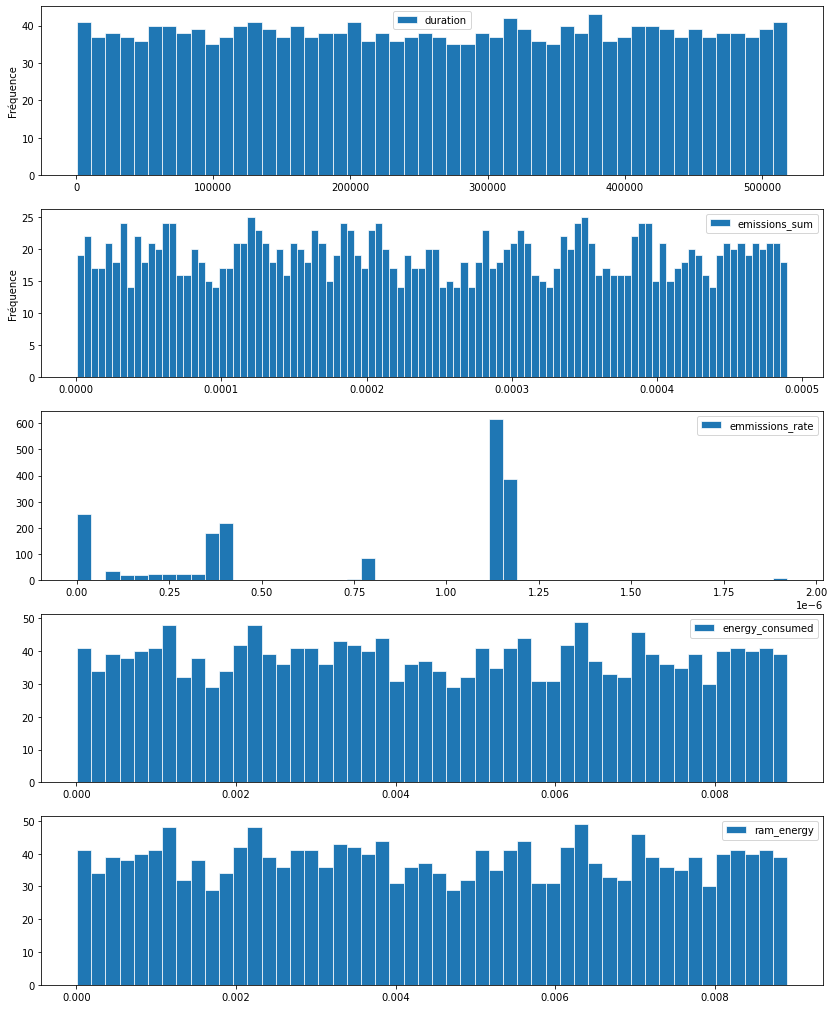

In [16]:
start = '2022-02-06 09:27:51.870023'
end = '2022-02-12 09:17:54.295848'
fig, ax = plt.subplots(5,figsize=(14,18))
ax[0].hist(dc5['duration'][start:end], bins=50,edgecolor="white", linewidth=0.7)
ax[0].set_ylabel('Fréquence')
ax[0].legend(['duration'])
ax[1].hist(dc5['emissions_sum'][start:end], bins=100,edgecolor="white", linewidth=0.7)
ax[1].set_ylabel('Fréquence')
ax[1].legend(['emissions_sum'])
ax[2].hist(dc5['emissions_rate'][start:end],bins=50,edgecolor="white", linewidth=0.7)
ax[2].legend(['emmissions_rate'])
ax[3].hist(dc5['energy_consumed'][start:end],bins=50,edgecolor="white", linewidth=0.7)
ax[3].legend(['energy_consumed'])
ax[4].hist(dc5['ram_energy'][start:end],bins=50,edgecolor="white", linewidth=0.7)
ax[4].legend(['ram_energy'])




## Colonne Duration

<AxesSubplot:xlabel='duration', ylabel='Count'>

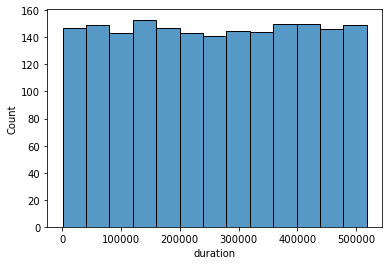

In [17]:
sns.histplot(data=dc5, x="duration")

<AxesSubplot:ylabel='duration'>

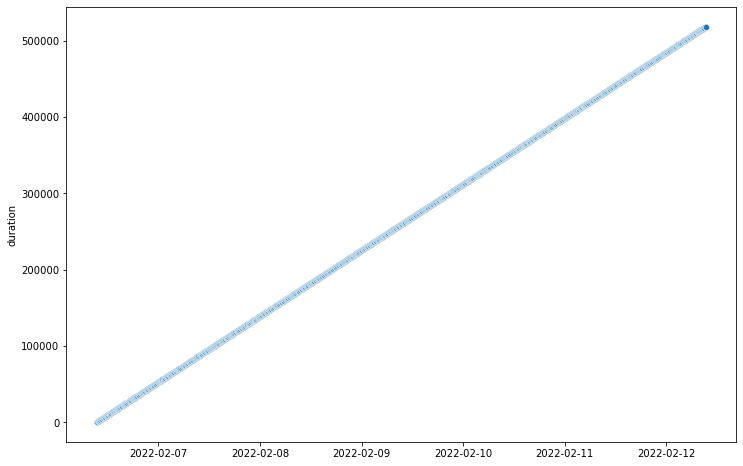

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=dc5.index.values, y="duration", data=dc5)

## Colonne Emissions_sum

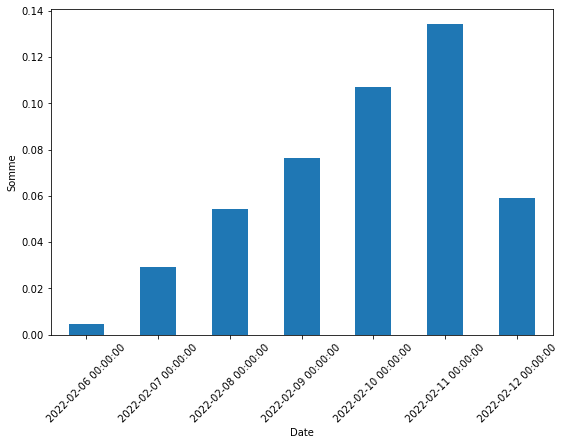

In [19]:
dc5.loc['2022','emissions_sum'].resample('D').sum().plot(kind='bar',figsize=(9,6))
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Somme')
plt.show()

<AxesSubplot:ylabel='emissions_sum'>

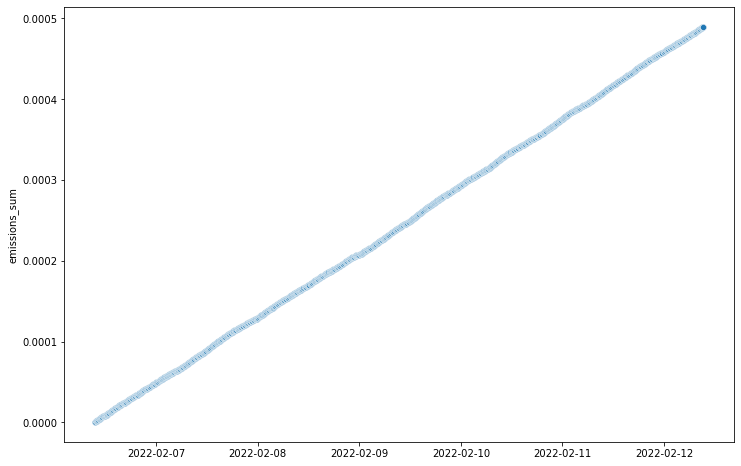

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=dc5.index.values, y="emissions_sum", data=dc5)

## Colonne emissions_rate

(array([325., 266., 219.,   4.,  83., 616., 385.,   0.,   0.,   9.]),
 array([0.00000000e+00, 1.92191776e-07, 3.84383551e-07, 5.76575327e-07,
        7.68767102e-07, 9.60958878e-07, 1.15315065e-06, 1.34534243e-06,
        1.53753420e-06, 1.72972598e-06, 1.92191776e-06]),
 <BarContainer object of 10 artists>)

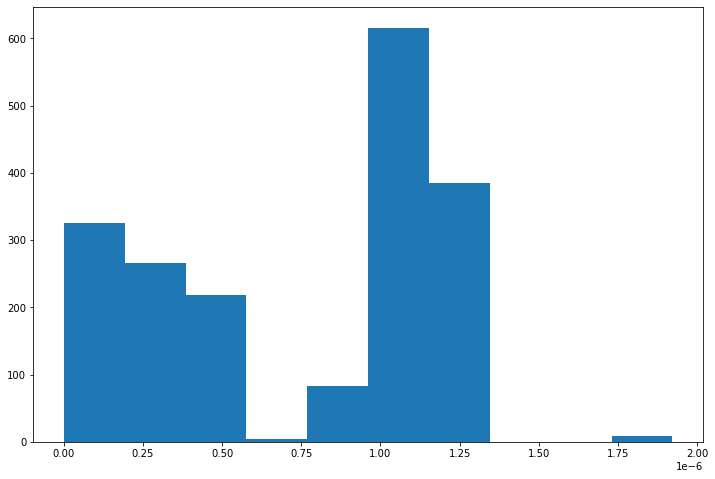

In [21]:
plt.figure(figsize=(12,8))
plt.hist(dc5['emissions_rate'][start:end])


<AxesSubplot:ylabel='emissions_rate'>

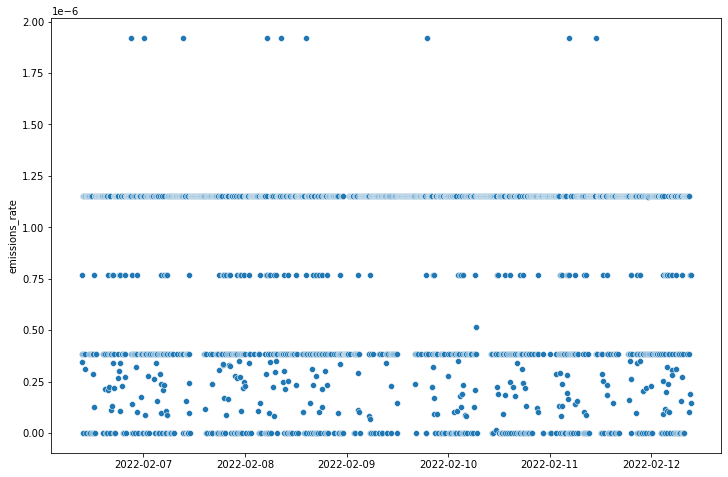

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=dc5.index.values, y="emissions_rate", data=dc5)

## Colonne energy_consumed

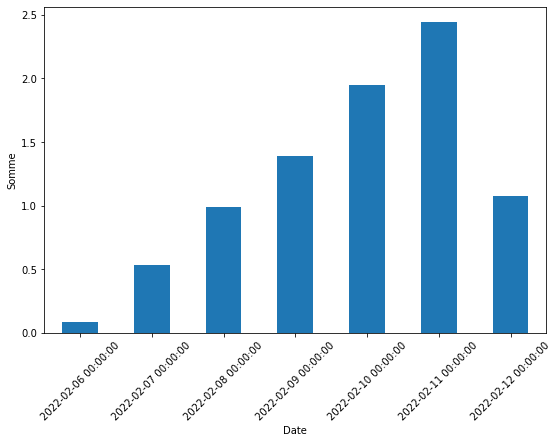

In [23]:
dc5.loc['2022','energy_consumed'].resample('D').sum().plot(kind='bar',figsize=(9,6))
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Somme')
plt.show()

<AxesSubplot:ylabel='energy_consumed'>

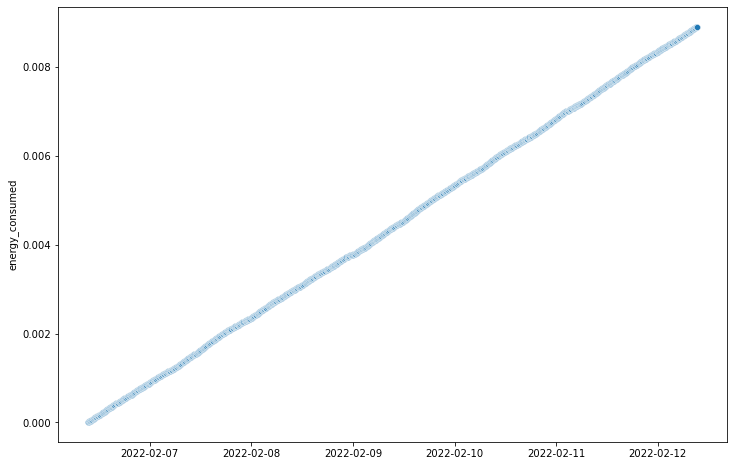

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=dc5.index.values, y="energy_consumed", data=dc5)

## Colonne ram_energy

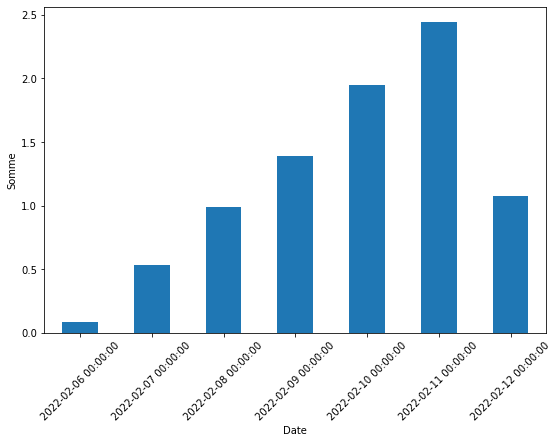

In [25]:
dc5.loc['2022','ram_energy'].resample('D').sum().plot(kind='bar',figsize=(9,6))
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Somme')
plt.show()

<AxesSubplot:ylabel='ram_energy'>

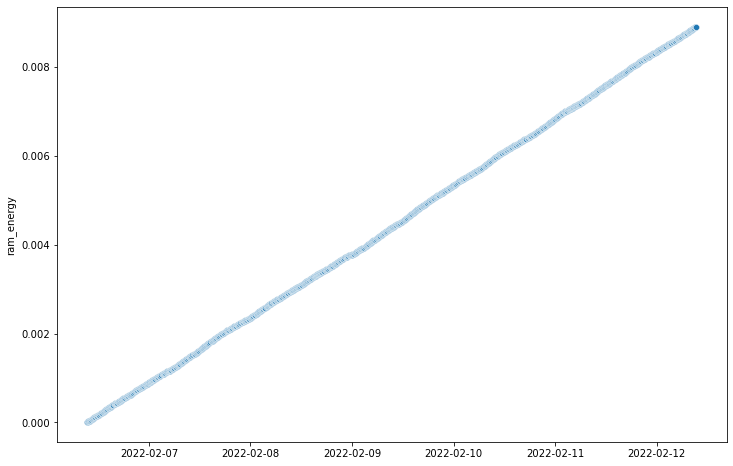

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=dc5.index.values, y="ram_energy", data=dc5)

In [27]:
corr = dc5[['duration', 'emissions_sum', 'emissions_rate',
       'energy_consumed','ram_energy', 'id', 'datacenter']].corr()
corr.style.background_gradient(cmap='coolwarm')

,duration,emissions_sum,emissions_rate,energy_consumed,ram_energy
duration,1.000000,0.999932,0.013112,0.999932,0.999932
emissions_sum,0.999932,1.000000,0.012896,1.000000,1.000000
emissions_rate,0.013112,0.012896,1.000000,0.012895,0.012895
energy_consumed,0.999932,1.000000,0.012895,1.000000,1.000000
ram_energy,0.999932,1.000000,0.012895,1.000000,1.000000


# DC2

In [28]:
dc2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1853 entries, 2022-02-06 09:27:01.869149 to 2022-02-12 09:22:03.693476
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   run_id           1853 non-null   object 
 1   duration         1853 non-null   int64  
 2   emissions_sum    1853 non-null   float64
 3   emissions_rate   1853 non-null   float64
 4   energy_consumed  1853 non-null   float64
 5   cpu_power        1853 non-null   float64
 6   gpu_power        1853 non-null   float64
 7   ram_power        1853 non-null   float64
 8   cpu_energy       1853 non-null   float64
 9   gpu_energy       1853 non-null   float64
 10  ram_energy       1853 non-null   float64
 11  id               1853 non-null   object 
 12  datacenter       1853 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 202.7+ KB


In [29]:
dc2.describe()

,duration,emissions_sum,emissions_rate,energy_consumed,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy
count,1853.000000,1.853000e+03,1.853000e+03,1853.000000,1853.0,1853.0,1.853000e+03,1853.0,1853.0,1853.000000
mean,258110.569887,2.668411e-04,8.940396e-07,0.004852,0.0,0.0,5.033165e-02,0.0,0.0,0.004852
std,149252.402172,1.541188e-04,4.308212e-07,0.002802,0.0,0.0,2.116934e-15,0.0,0.0,0.002802
min,599.000000,4.612874e-07,0.000000e+00,0.000008,0.0,0.0,5.033165e-02,0.0,0.0,0.000008
25%,128700.000000,1.341083e-04,3.844433e-07,0.002438,0.0,0.0,5.033165e-02,0.0,0.0,0.002438
50%,257101.000000,2.655645e-04,1.153079e-06,0.004828,0.0,0.0,5.033165e-02,0.0,0.0,0.004828
75%,386701.000000,3.990966e-04,1.153147e-06,0.007256,0.0,0.0,5.033165e-02,0.0,0.0,0.007256
max,518701.000000,5.386249e-04,1.921657e-06,0.009793,0.0,0.0,5.033165e-02,0.0,0.0,0.009793


In [30]:
# J'affiche le nombre de valeurs uniques par colonne
for col in dc2:
    print(col,dc2[col].nunique(),dc2[col].unique()) 
    print("________________")   

run_id 1 ['a7174852-7357-4276-8a21-bcf787fb83a5']
________________
duration 1594 [   599    600    900 ... 517801 518101 518701]
________________
emissions_sum 1671 [4.61287375e-07 4.61326954e-07 5.76612227e-07 ... 5.37933001e-04
 5.37933004e-04 5.38624890e-04]
________________
emissions_rate 1672 [7.68874528e-07 2.38964917e-07 3.84362447e-07 ... 3.84412064e-07
 9.84778000e-08 1.15314317e-06]
________________
energy_consumed 1671 [8.38704319e-06 8.38776281e-06 1.04838587e-05 ... 9.78060002e-03
 9.78060007e-03 9.79317981e-03]
________________
cpu_power 1 [0.]
________________
gpu_power 1 [0.]
________________
ram_power 1 [0.05033165]
________________
cpu_energy 1 [0.]
________________
gpu_energy 1 [0.]
________________
ram_energy 1671 [8.38704319e-06 8.38776281e-06 1.04838587e-05 ... 9.78060002e-03
 9.78060007e-03 9.79317981e-03]
________________
id 1853 ['313bbb7e-a7bd-4b36-81fe-b9ad07a4d72c'
 'b73dd12b-c8c4-4914-a059-8eaa8218d8db'
 '546cf764-7b1c-48a9-9bae-16125af7c609' ...
 '970b01eb

Il y a 7 colonnes contenant une seule valeur :
* run_id
* cpu_power
* gpu_power
* ram_power
* cpu_energy
* gpu_energy

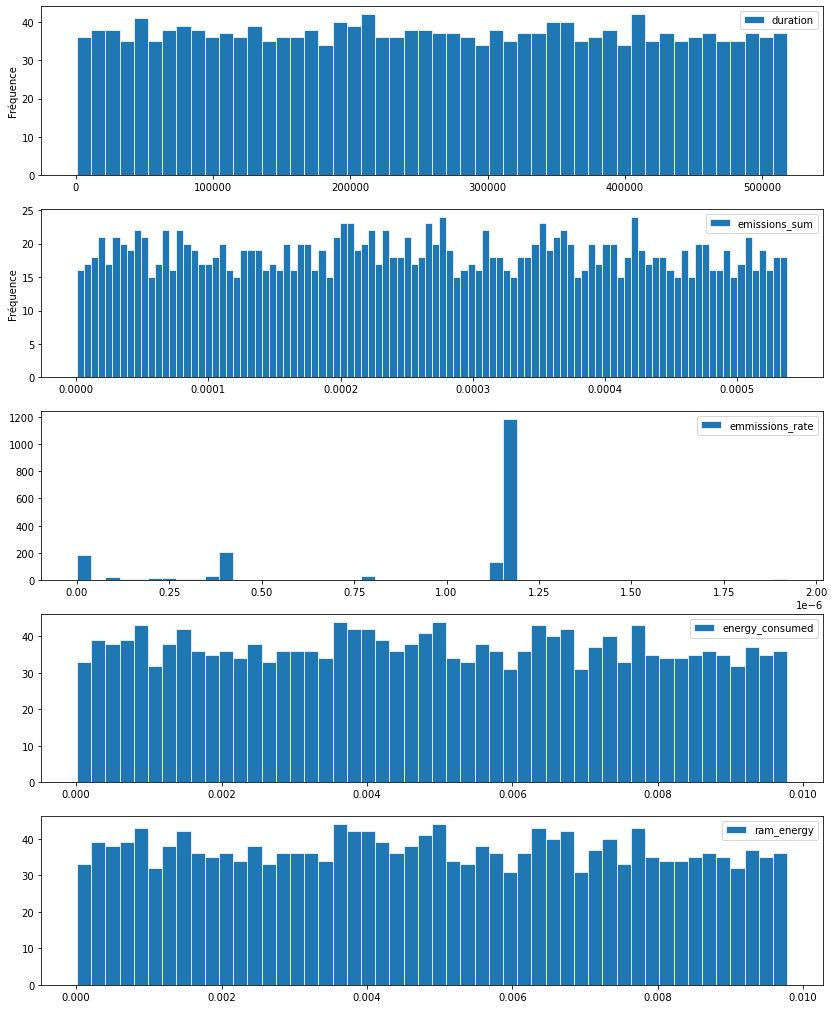

In [31]:
start = '2022-02-06 09:27:51.870023'
end = '2022-02-12 09:17:54.295848'
fig, ax = plt.subplots(5,figsize=(14,18))
ax[0].hist(dc2['duration'][start:end], bins=50,edgecolor="white", linewidth=0.7)
ax[0].set_ylabel('Fréquence')
ax[0].legend(['duration'])
ax[1].hist(dc2['emissions_sum'][start:end], bins=100,edgecolor="white", linewidth=0.7)
ax[1].set_ylabel('Fréquence')
ax[1].legend(['emissions_sum'])
ax[2].hist(dc2['emissions_rate'][start:end],bins=50,edgecolor="white", linewidth=0.7)
ax[2].legend(['emmissions_rate'])
ax[3].hist(dc2['energy_consumed'][start:end],bins=50,edgecolor="white", linewidth=0.7)
ax[3].legend(['energy_consumed'])
ax[4].hist(dc2['ram_energy'][start:end],bins=50,edgecolor="white", linewidth=0.7)
ax[4].legend(['ram_energy'])




## Colonne Duration

<AxesSubplot:xlabel='duration', ylabel='Count'>

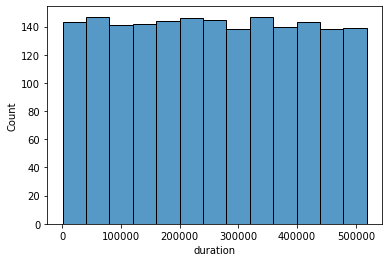

In [32]:
sns.histplot(data=dc2, x="duration")

<AxesSubplot:xlabel='timestamp', ylabel='duration'>

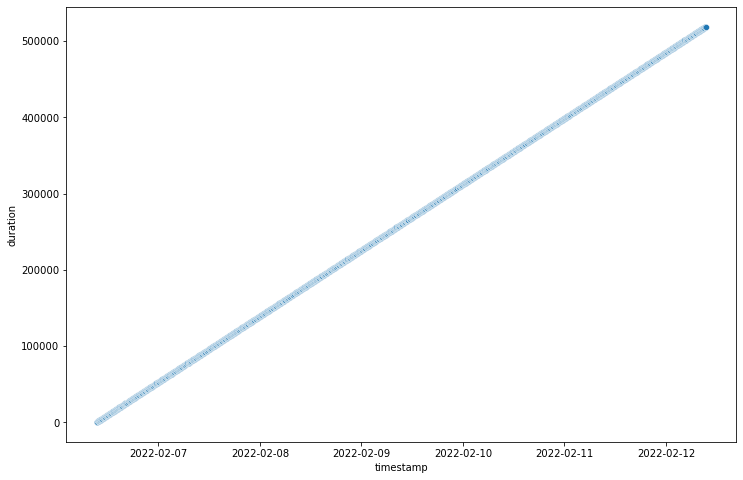

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=dc2, x=dc2.index, y='duration')

## Colonne Emissions_sum

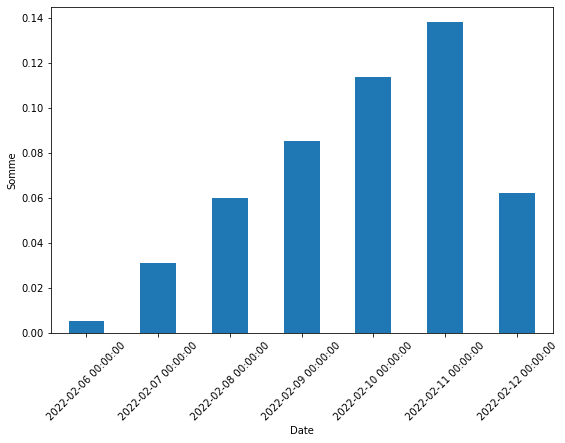

In [34]:
dc2.loc['2022','emissions_sum'].resample('D').sum().plot(kind='bar',figsize=(9,6))
plt.xticks(rotation = 45,)
plt.xlabel('Date')
plt.ylabel('Somme')
plt.show()

<AxesSubplot:xlabel='timestamp', ylabel='emissions_sum'>

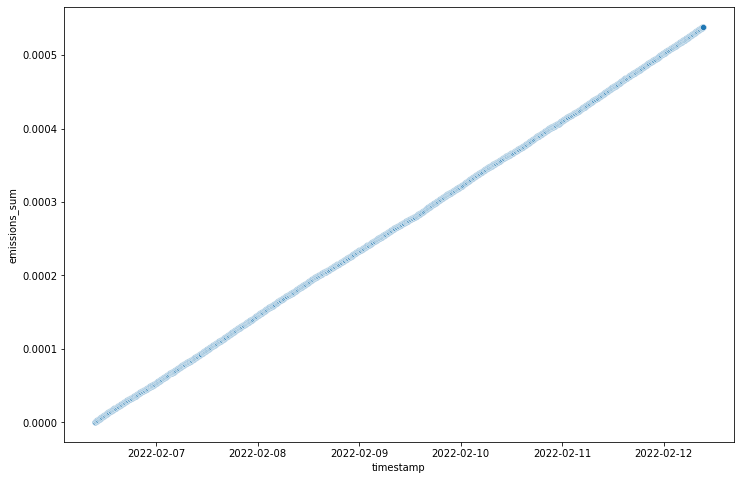

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=dc2, x=dc2.index, y='emissions_sum')

## Colonne emissions_rate

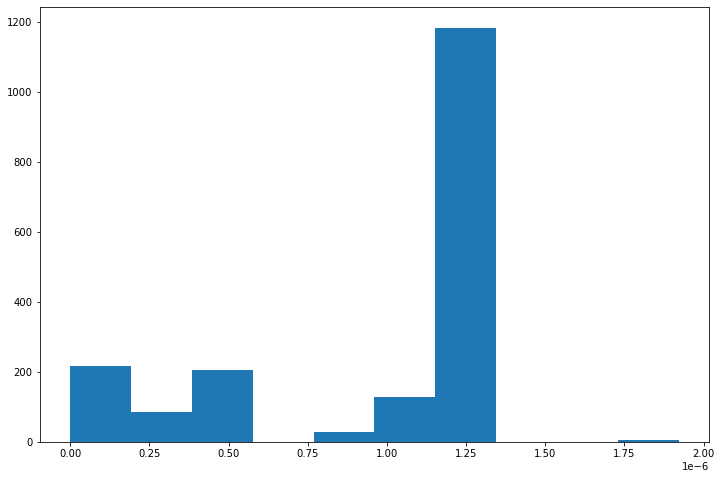

In [36]:
plt.figure(figsize=(12,8))
plt.hist(dc2['emissions_rate'][start:end])
plt.show()


<AxesSubplot:xlabel='timestamp', ylabel='emissions_rate'>

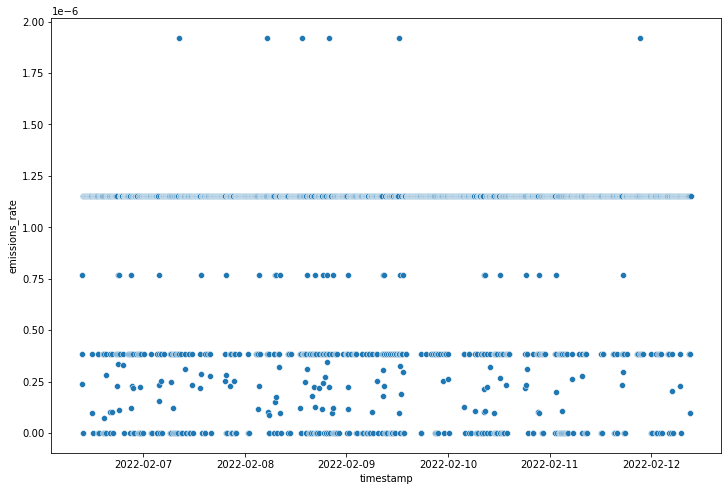

In [37]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=dc2, x=dc2.index, y='emissions_rate')

## Colonne energy_consumed

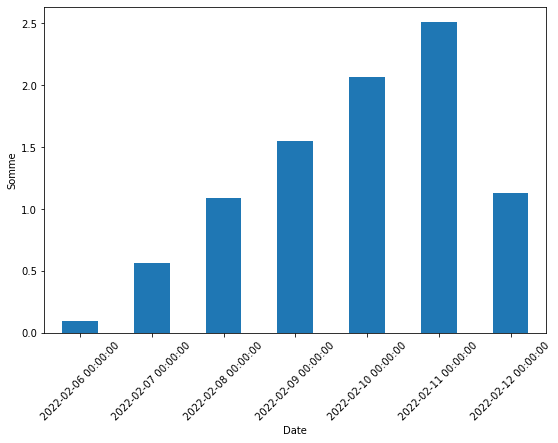

In [38]:
dc2.loc['2022','energy_consumed'].resample('D').sum().plot(kind='bar',figsize=(9,6))
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Somme')
plt.show()

<AxesSubplot:xlabel='timestamp', ylabel='energy_consumed'>

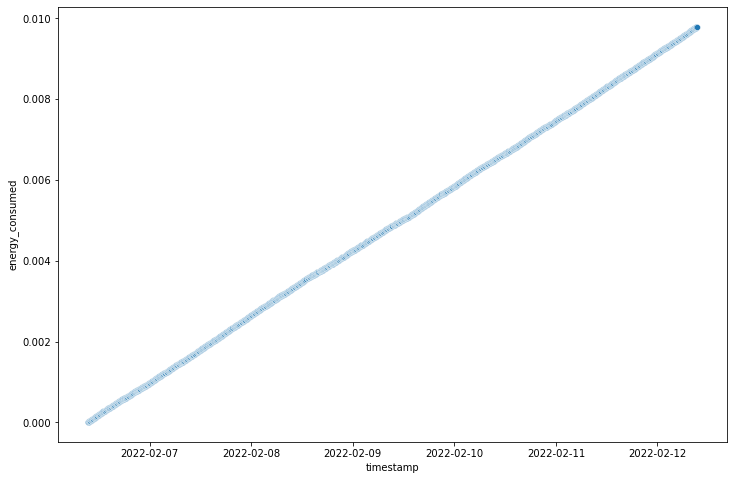

In [39]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=dc2, x=dc2.index, y='energy_consumed')

## Colonne ram_energy

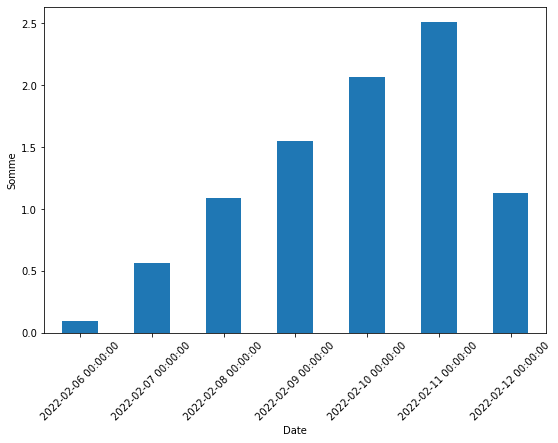

In [40]:
dc2.loc['2022','ram_energy'].resample('D').sum().plot(kind='bar',figsize=(9,6))
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Somme')
plt.show()

<AxesSubplot:xlabel='timestamp', ylabel='ram_energy'>

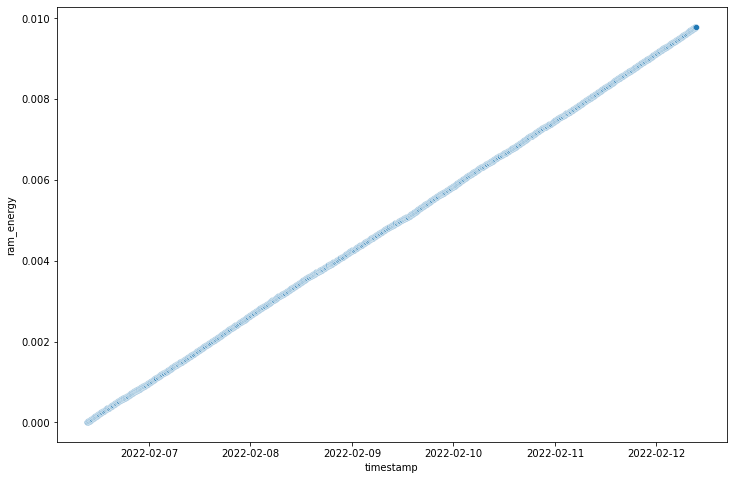

In [41]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=dc2, x=dc2.index, y='ram_energy')

In [42]:
corr1 = dc2[['duration', 'emissions_sum', 'emissions_rate',
       'energy_consumed','ram_energy', 'id', 'datacenter']].corr()
corr1.style.background_gradient(cmap='coolwarm')

,duration,emissions_sum,emissions_rate,energy_consumed,ram_energy
duration,1.000000,0.999968,0.055582,0.999968,0.999968
emissions_sum,0.999968,1.000000,0.056156,1.000000,1.000000
emissions_rate,0.055582,0.056156,1.000000,0.056156,0.056156
energy_consumed,0.999968,1.000000,0.056156,1.000000,1.000000
ram_energy,0.999968,1.000000,0.056156,1.000000,1.000000


# run_laptop

In [43]:
run_laptop.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 733 entries, 2022-02-08 20:43:59.099275 to 2022-02-11 23:38:49.440129
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   run_id           733 non-null    object 
 1   duration         733 non-null    int64  
 2   emissions_sum    733 non-null    float64
 3   emissions_rate   733 non-null    float64
 4   energy_consumed  733 non-null    float64
 5   cpu_power        733 non-null    float64
 6   gpu_power        733 non-null    float64
 7   ram_power        733 non-null    float64
 8   cpu_energy       733 non-null    float64
 9   gpu_energy       733 non-null    float64
 10  ram_energy       733 non-null    float64
 11  id               733 non-null    object 
 12  datacenter       733 non-null    object 
dtypes: float64(9), int64(1), object(3)
memory usage: 80.2+ KB


In [44]:
run_laptop.describe()

,duration,emissions_sum,emissions_rate,energy_consumed,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy
count,733.000000,7.330000e+02,733.000000,733.000000,733.0,733.0,7.330000e+02,733.0,733.0,733.000000
mean,63287.688950,1.370807e-01,0.000110,2.492376,0.0,0.0,6.246089e+00,0.0,0.0,2.492376
std,43957.956535,1.404759e-01,0.000861,2.554108,0.0,0.0,2.844112e-14,0.0,0.0,2.554108
min,3.000000,1.449370e-07,0.000000,0.000003,0.0,0.0,6.246089e+00,0.0,0.0,0.000003
25%,24821.000000,3.391717e-03,0.000024,0.061668,0.0,0.0,6.246089e+00,0.0,0.0,0.061668
50%,51823.000000,5.598471e-02,0.000048,1.017904,0.0,0.0,6.246089e+00,0.0,0.0,1.017904
75%,107437.000000,2.925238e-01,0.000111,5.318614,0.0,0.0,6.246089e+00,0.0,0.0,5.318614
max,142027.000000,2.961985e-01,0.019856,5.385427,0.0,0.0,6.246089e+00,0.0,0.0,5.385427


In [45]:
# J'affiche le nombre de valeurs uniques par colonne
for col in run_laptop:
    print(col,run_laptop[col].nunique(),run_laptop[col].unique()) 
    print("________________")   

run_id 3 ['b266fd67-6b41-46eb-97f5-c676271bd7e8'
 '3a3f9228-0e60-4fd1-b9fa-213812f0365f'
 'acf6d163-0753-4177-8de2-9dbb7af4fc0c']
________________
duration 510 [     3    320    640    940   1240   1560   1860   2180   2480   2780
   3080   3380   3700   4000   4300   4600   4920   5220   5520   5840
   6140   6460   6760   7080   7380   7680   8000   8320   8620   8940
   9240   9540   9840  10140  10440  10760  11080  11400  11700  12000
  12300  12600  12900  13200  13500  13800  14100  14400  14700  15000
  15320  15321  15621  15941  16241  16561  16881  17181  17501  17801
  18101  18401  18701  19001  19301  19621  19921  20221  20521  20821
  21121  21421  21741  22061  22381  22681  22981  23281  23601  23921
  24221  24521  24821  25141  25441  25741  26041  26341  26641  26961
  27261  27581  27901  28201  28501  28821  29121  29441  29741  30061
  30361  30681  31002  31302  31602  31902  32202  32522  32822  33142
  33442  33742  34042  34342  34662  34962  35262  35582  3

Il y a 7 colonnes contenant une seule valeur :
* run_id
* cpu_power
* gpu_power
* ram_power
* cpu_energy
* gpu_energy

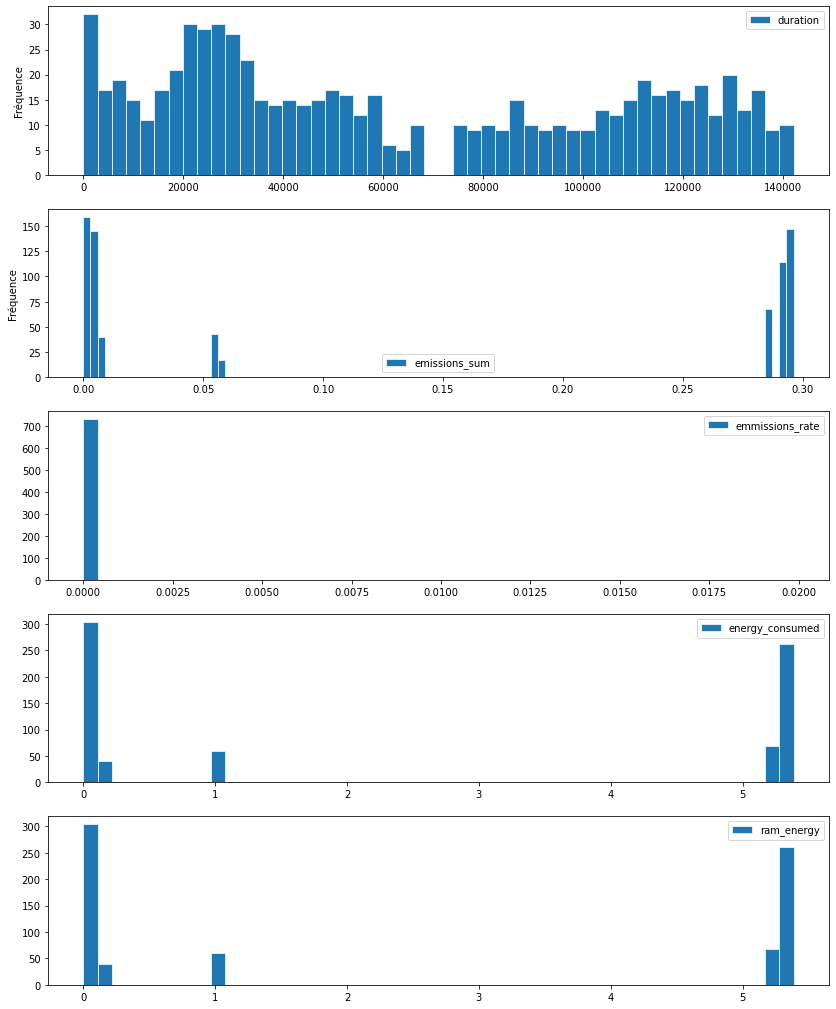

In [46]:
start = '2022-02-06 09:27:51.870023'
end = '2022-02-12 09:17:54.295848'
fig, ax = plt.subplots(5,figsize=(14,18))
ax[0].hist(run_laptop['duration'][start:end], bins=50,edgecolor="white", linewidth=0.7)
ax[0].set_ylabel('Fréquence')
ax[0].legend(['duration'])
ax[1].hist(run_laptop['emissions_sum'][start:end], bins=100,edgecolor="white", linewidth=0.7)
ax[1].set_ylabel('Fréquence')
ax[1].legend(['emissions_sum'])
ax[2].hist(run_laptop['emissions_rate'][start:end],bins=50,edgecolor="white", linewidth=0.7)
ax[2].legend(['emmissions_rate'])
ax[3].hist(run_laptop['energy_consumed'][start:end],bins=50,edgecolor="white", linewidth=0.7)
ax[3].legend(['energy_consumed'])
ax[4].hist(run_laptop['ram_energy'][start:end],bins=50,edgecolor="white", linewidth=0.7)
ax[4].legend(['ram_energy'])




## Colonne Duration

<AxesSubplot:xlabel='duration', ylabel='Count'>

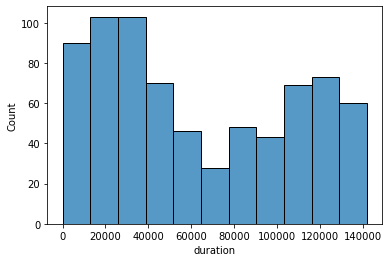

In [47]:
sns.histplot(data=run_laptop, x="duration")

<AxesSubplot:xlabel='timestamp', ylabel='duration'>

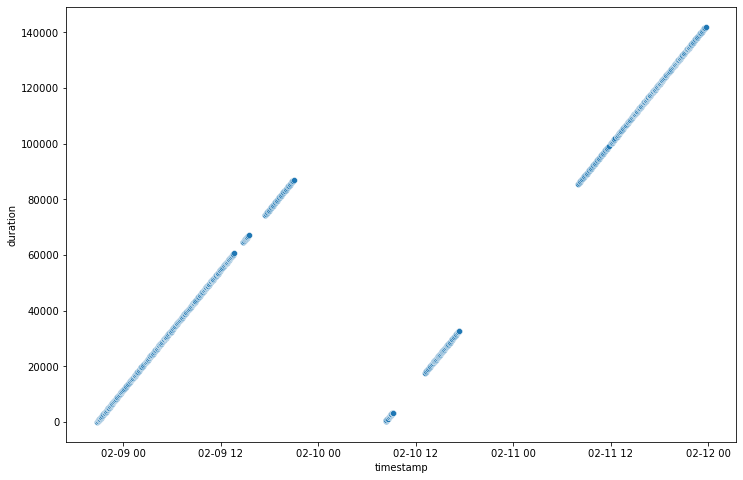

In [48]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=run_laptop, x=run_laptop.index, y='duration')

## Colonne Emissions_sum

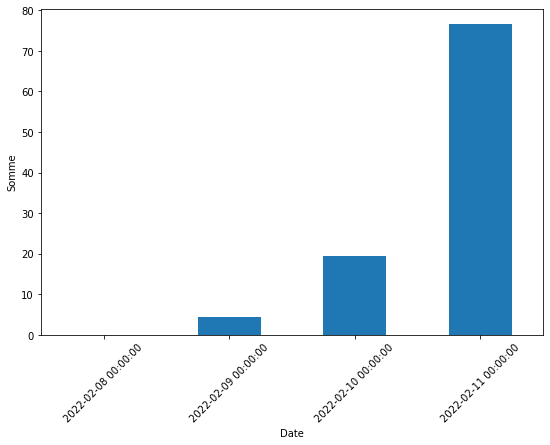

In [49]:
run_laptop.loc['2022','emissions_sum'].resample('D').sum().plot(kind='bar',figsize=(9,6))
plt.xticks(rotation = 45,)
plt.xlabel('Date')
plt.ylabel('Somme')
plt.show()

<AxesSubplot:xlabel='timestamp', ylabel='emissions_sum'>

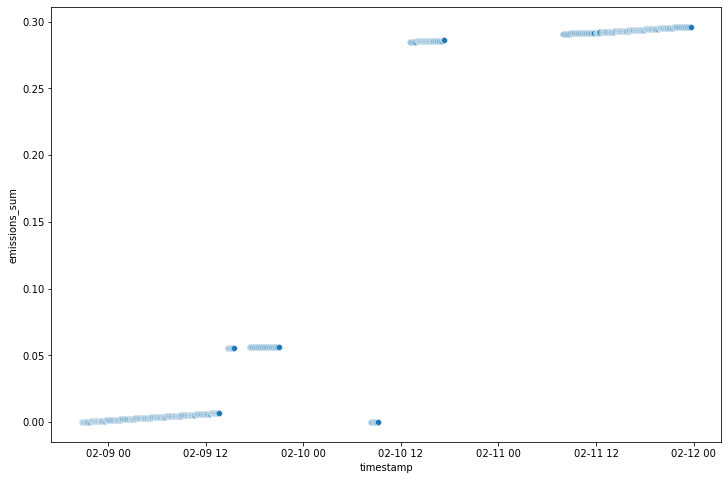

In [50]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=run_laptop, x=run_laptop.index, y='emissions_sum')

## Colonne emissions_rate

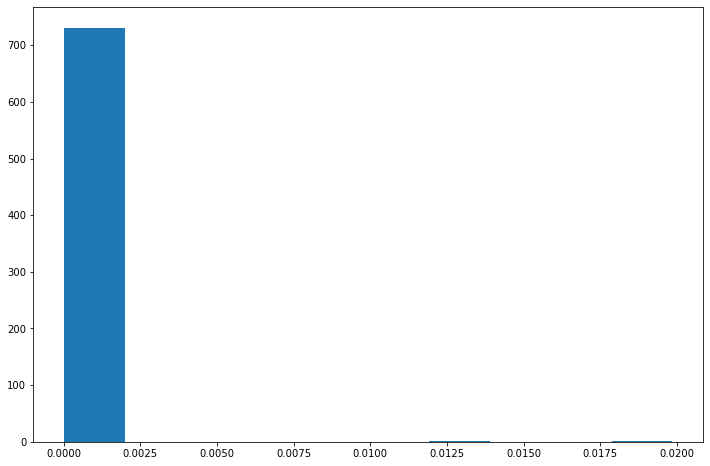

In [51]:
plt.figure(figsize=(12,8))
plt.hist(run_laptop['emissions_rate'][start:end])
plt.show()


<AxesSubplot:xlabel='timestamp', ylabel='emissions_rate'>

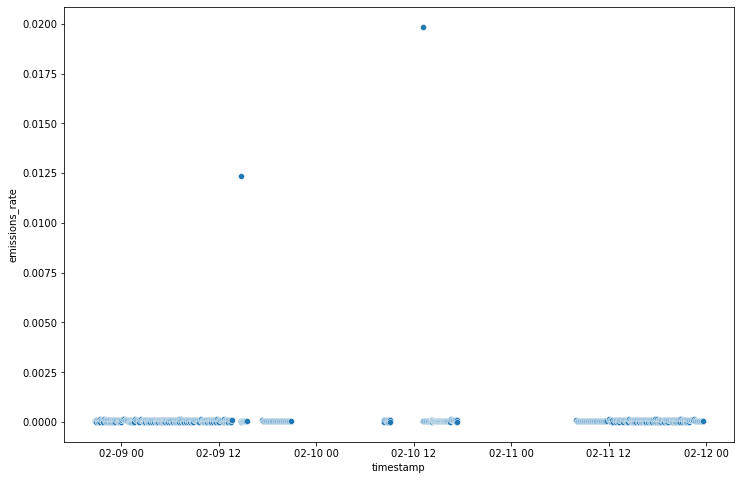

In [52]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=run_laptop, x=run_laptop.index, y='emissions_rate')

## Colonne energy_consumed

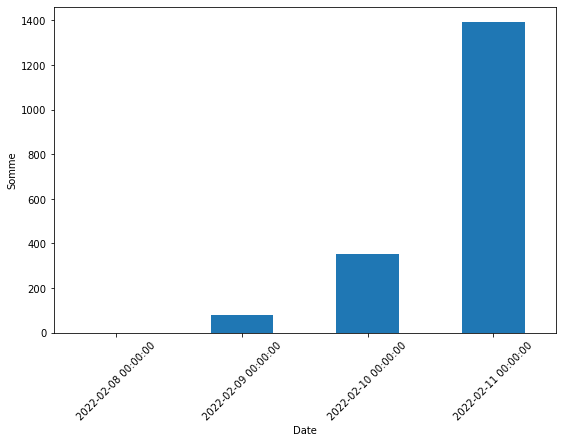

In [53]:
run_laptop.loc['2022','energy_consumed'].resample('D').sum().plot(kind='bar',figsize=(9,6))
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Somme')
plt.show()

<AxesSubplot:xlabel='timestamp', ylabel='energy_consumed'>

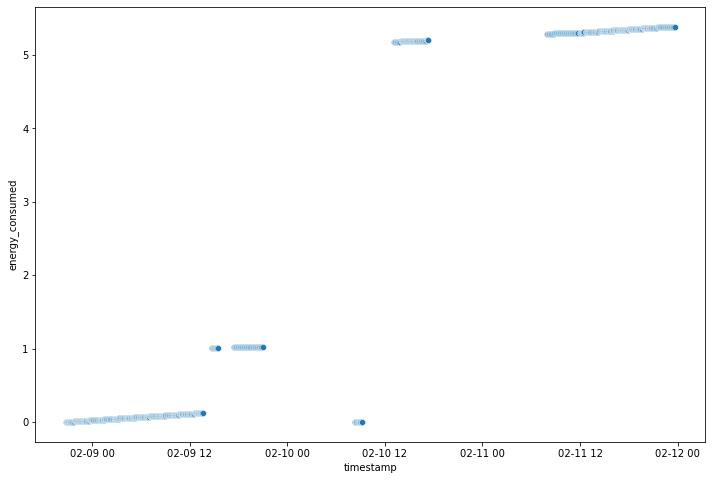

In [54]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=run_laptop, x=run_laptop.index, y='energy_consumed')

## Colonne ram_energy

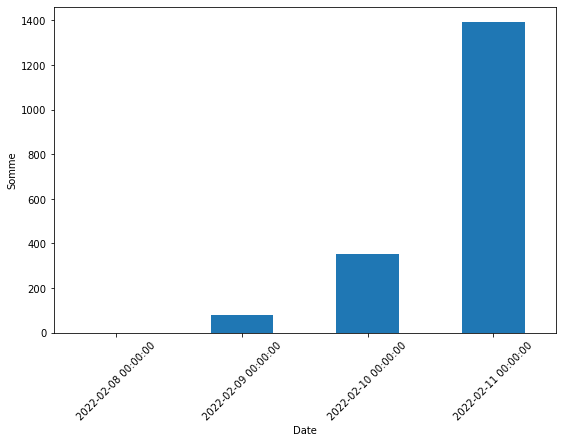

In [55]:
run_laptop.loc['2022','ram_energy'].resample('D').sum().plot(kind='bar',figsize=(9,6))
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Somme')
plt.show()

<AxesSubplot:xlabel='timestamp', ylabel='ram_energy'>

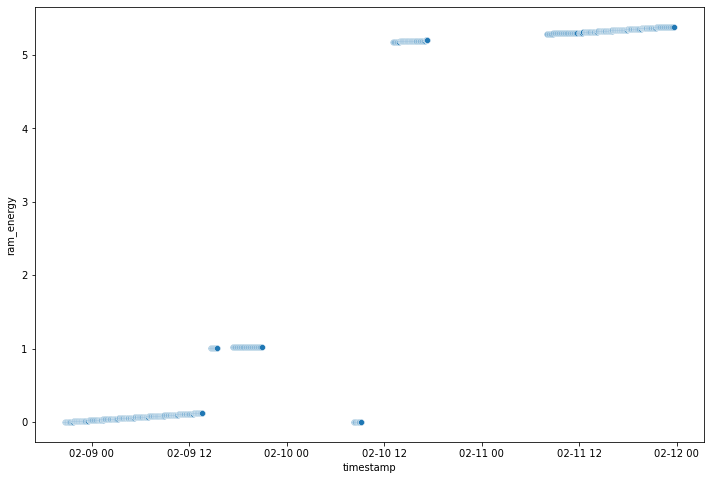

In [56]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=run_laptop, x=run_laptop.index, y='ram_energy')

In [57]:
corr2 = run_laptop[['duration', 'emissions_sum', 'emissions_rate',
       'energy_consumed','ram_energy', 'id', 'datacenter']].corr()
corr2.style.background_gradient(cmap='coolwarm')

,duration,emissions_sum,emissions_rate,energy_consumed,ram_energy
duration,1.000000,0.730843,-0.032983,0.730843,0.730843
emissions_sum,0.730843,1.000000,0.018685,1.000000,1.000000
emissions_rate,-0.032983,0.018685,1.000000,0.018685,0.018685
energy_consumed,0.730843,1.000000,0.018685,1.000000,1.000000
ram_energy,0.730843,1.000000,0.018685,1.000000,1.000000


# ben_desktop

In [58]:
ben_desktop.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 916 entries, 2022-02-08 21:20:43.196150 to 2022-02-12 09:27:01.303635
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   run_id           916 non-null    object 
 1   duration         916 non-null    int64  
 2   emissions_sum    916 non-null    float64
 3   emissions_rate   916 non-null    float64
 4   energy_consumed  916 non-null    float64
 5   cpu_power        916 non-null    float64
 6   gpu_power        916 non-null    float64
 7   ram_power        916 non-null    float64
 8   cpu_energy       916 non-null    float64
 9   gpu_energy       916 non-null    float64
 10  ram_energy       916 non-null    float64
 11  id               916 non-null    object 
 12  datacenter       916 non-null    object 
dtypes: float64(9), int64(1), object(3)
memory usage: 100.2+ KB


In [59]:
ben_desktop.describe()

,duration,emissions_sum,emissions_rate,energy_consumed,cpu_power,gpu_power,ram_power,cpu_energy,gpu_energy,ram_energy
count,916.000000,916.000000,916.000000,916.000000,916.0,916.000000,9.160000e+02,916.000000,916.000000,916.000000
mean,72075.082969,0.334080,0.004645,6.074173,90.0,201.721469,1.259158e+01,1.801340,4.020814,0.252019
std,45126.502079,0.208584,0.000262,3.792437,0.0,16.974726,6.931576e-14,1.126981,2.511645,0.157672
min,31.000000,0.000049,0.001563,0.000891,90.0,0.000000,1.259158e+01,0.000781,0.000000,0.000109
25%,34128.000000,0.158457,0.004672,2.881035,90.0,203.388000,1.259158e+01,0.853206,1.912536,0.119369
50%,68406.500000,0.318929,0.004677,5.798712,90.0,203.837000,1.259158e+01,1.709854,3.849642,0.239220
75%,104485.000000,0.488498,0.004683,8.881778,90.0,204.295750,1.259158e+01,2.610324,5.869319,0.365201
max,165017.000000,0.772027,0.005132,14.036860,90.0,212.263000,1.259158e+01,4.122509,9.337585,0.576765


In [60]:
# J'affiche le nombre de valeurs uniques par colonne
for col in ben_desktop:
    print(col,ben_desktop[col].nunique(),ben_desktop[col].unique()) 
    print("________________")   

run_id 4 ['72f6dfdb-bd73-4b5a-bf32-77f366d324d1'
 'b94d821a-fba1-4619-95c6-fbe82c1a83dd'
 '33a9a128-0375-42bc-9e39-ec4c30dca809'
 '7d622bb7-aec8-4513-9f44-0225c4b7f1f2']
________________
duration 700 [    31    300    600    900   1200   1500   1800   2100   2400   2700
   3000   3300   3600   3900   4200   4500   4800   5100   5400   5700
   6000   6300   6600   6900   7200   7500   7800   8100   8400   8700
   9000   9300   9600   9900  10201  10501  10801  11101  11401  11701
  12001  12301  12601  12901  13201  13501  13801  14101  14401  14701
  15001  15301  15601  15901  16201  16501  16801  17101  17401  17701
  18001  18301  18601  18901  19201  19502  19802  20102  20402  20702
  21002  21302  21602  21902  22202  22502  22802  23102  23402  23702
  24002  24302  24602  24902  25202  25502  25802  26102  26402  26702
  27002  27302  27602  27902  28202  28502  28802  29103  29403  29703
  30003  30303  30603  30903  31203  31503  31803  32103  32403  32703
  33003  33303  336

Il y a 4 colonnes contenant une seule valeur :
* run_id
* cpu_power
* ram_power
* datacenter


In [61]:
ben_desktop.columns

Index(['run_id', 'duration', 'emissions_sum', 'emissions_rate',
       'energy_consumed', 'cpu_power', 'gpu_power', 'ram_power', 'cpu_energy',
       'gpu_energy', 'ram_energy', 'id', 'datacenter'],
      dtype='object')

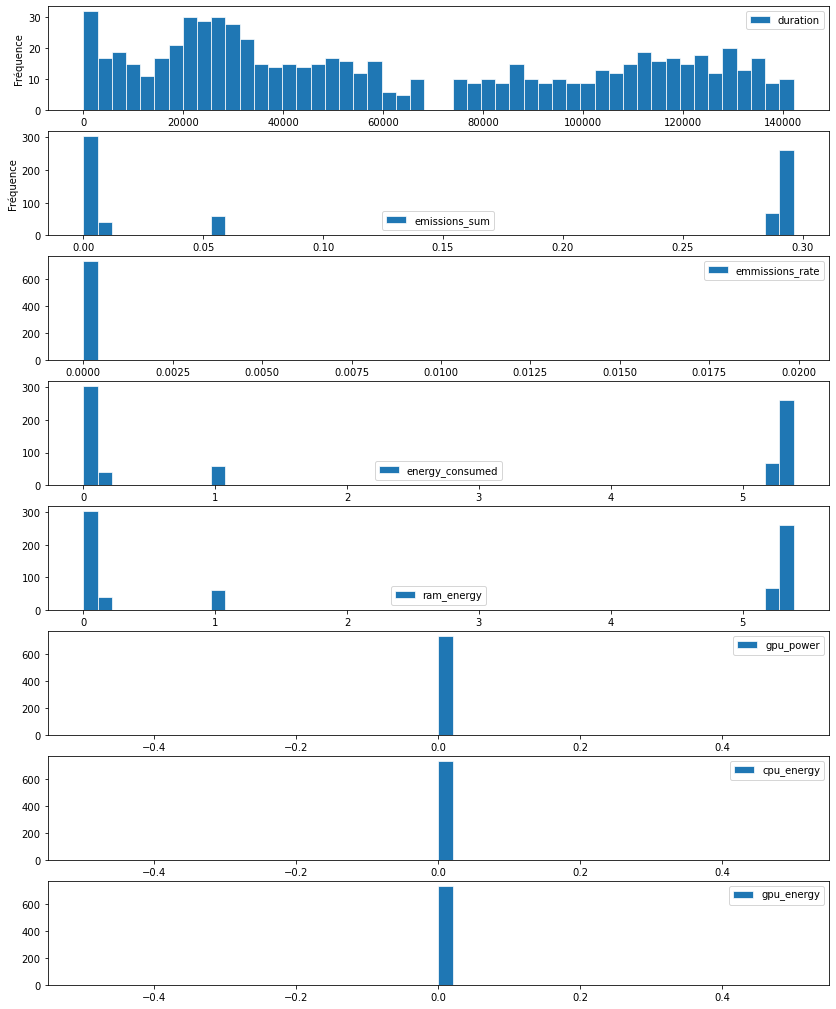

In [62]:
start = '2022-02-06 09:27:51.870023'
end = '2022-02-12 09:17:54.295848'
fig, ax = plt.subplots(8,figsize=(14,18))
ax[0].hist(run_laptop['duration'][start:end], bins=50,edgecolor="white", linewidth=0.7)
ax[0].set_ylabel('Fréquence')
ax[0].legend(['duration'])
ax[1].hist(run_laptop['emissions_sum'][start:end], bins=50,edgecolor="white", linewidth=0.7)
ax[1].set_ylabel('Fréquence')
ax[1].legend(['emissions_sum'])
ax[2].hist(run_laptop['emissions_rate'][start:end],bins=50,edgecolor="white", linewidth=0.7)
ax[2].legend(['emmissions_rate'])
ax[3].hist(run_laptop['energy_consumed'][start:end],bins=50,edgecolor="white", linewidth=0.7)
ax[3].legend(['energy_consumed'])
ax[4].hist(run_laptop['ram_energy'][start:end],bins=50,edgecolor="white", linewidth=0.7)
ax[4].legend(['ram_energy'])
ax[5].hist(run_laptop['gpu_power'][start:end],bins=50,edgecolor="white", linewidth=0.7)
ax[5].legend(['gpu_power'])
ax[6].hist(run_laptop['cpu_energy'][start:end],bins=50,edgecolor="white", linewidth=0.7)
ax[6].legend(['cpu_energy'])
ax[7].hist(run_laptop['gpu_energy'][start:end],bins=50,edgecolor="white", linewidth=0.7)
ax[7].legend(['gpu_energy'])




## Colonne Duration

<AxesSubplot:xlabel='duration', ylabel='Count'>

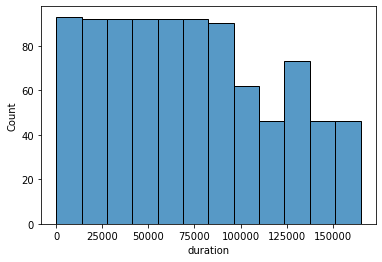

In [63]:
sns.histplot(data=ben_desktop, x="duration")

<AxesSubplot:xlabel='timestamp', ylabel='duration'>

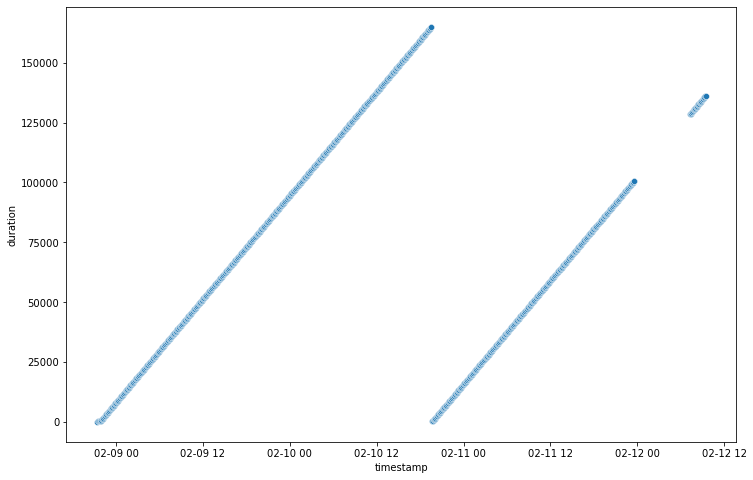

In [64]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=ben_desktop, x=ben_desktop.index, y='duration')

## Colonne Emissions_sum

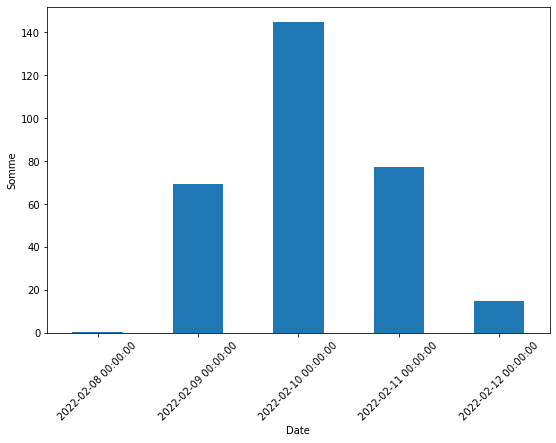

In [65]:
ben_desktop.loc['2022','emissions_sum'].resample('D').sum().plot(kind='bar',figsize=(9,6))
plt.xticks(rotation = 45,)
plt.xlabel('Date')
plt.ylabel('Somme')
plt.show()

<AxesSubplot:xlabel='timestamp', ylabel='emissions_sum'>

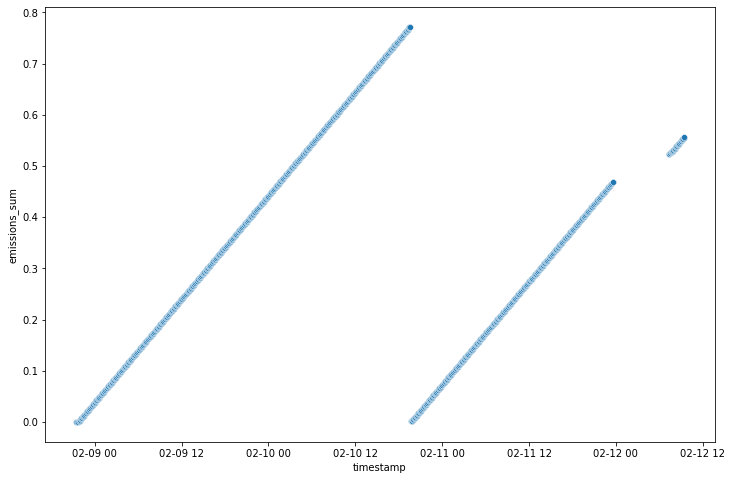

In [66]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=ben_desktop, x=ben_desktop.index, y='emissions_sum')

## Colonne emissions_rate

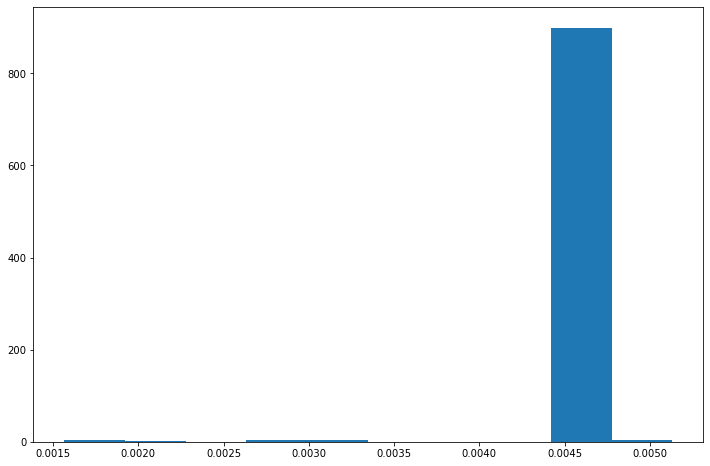

In [67]:
plt.figure(figsize=(12,8))
plt.hist(ben_desktop['emissions_rate'][start:end])
plt.show()


<AxesSubplot:xlabel='timestamp', ylabel='emissions_rate'>

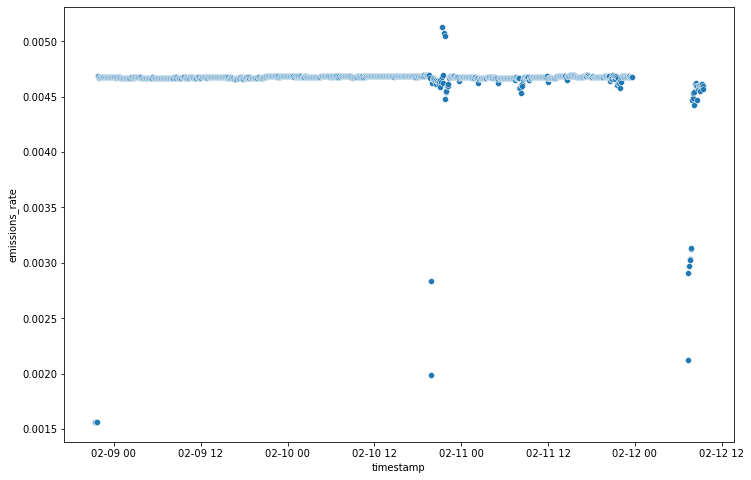

In [68]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=ben_desktop, x=ben_desktop.index, y='emissions_rate')

## Colonne energy_consumed

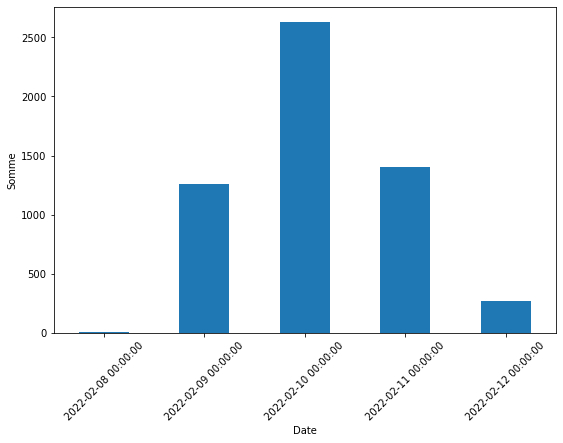

In [69]:
ben_desktop.loc['2022','energy_consumed'].resample('D').sum().plot(kind='bar',figsize=(9,6))
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Somme')
plt.show()

<AxesSubplot:xlabel='timestamp', ylabel='energy_consumed'>

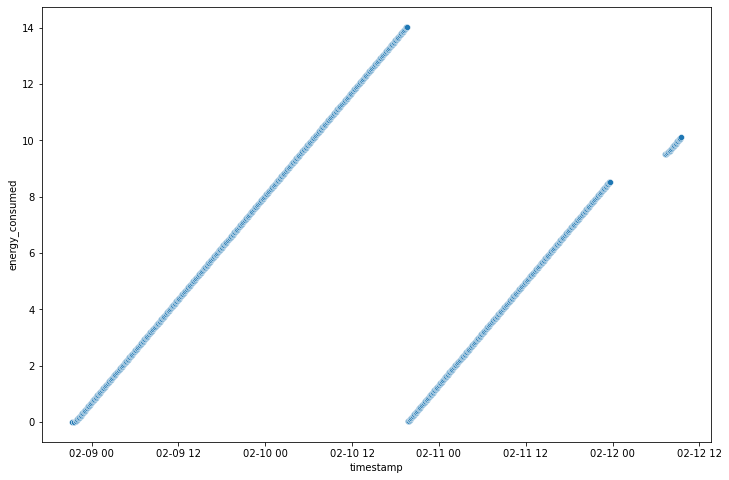

In [70]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=ben_desktop, x=ben_desktop.index, y='energy_consumed')

## Colonne ram_energy

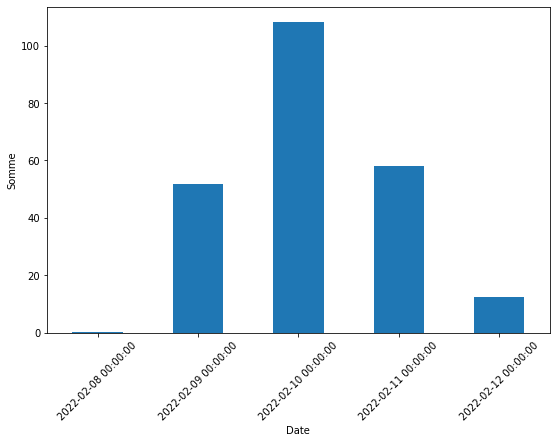

In [71]:
ben_desktop.loc['2022','ram_energy'].resample('D').sum().plot(kind='bar',figsize=(9,6))
plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('Somme')
plt.show()

<AxesSubplot:xlabel='timestamp', ylabel='ram_energy'>

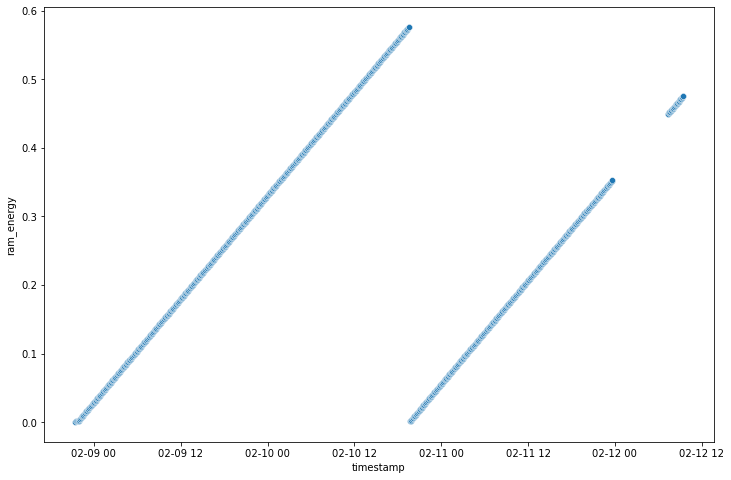

In [72]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=ben_desktop, x=ben_desktop.index, y='ram_energy')

# gpu_power

<AxesSubplot:xlabel='timestamp', ylabel='gpu_power'>

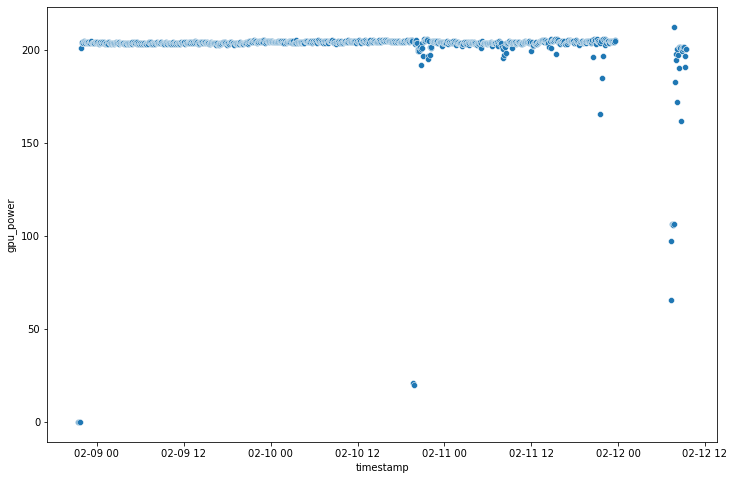

In [73]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=ben_desktop, x=ben_desktop.index, y='gpu_power')

# cpu_energy

<AxesSubplot:xlabel='timestamp', ylabel='cpu_energy'>

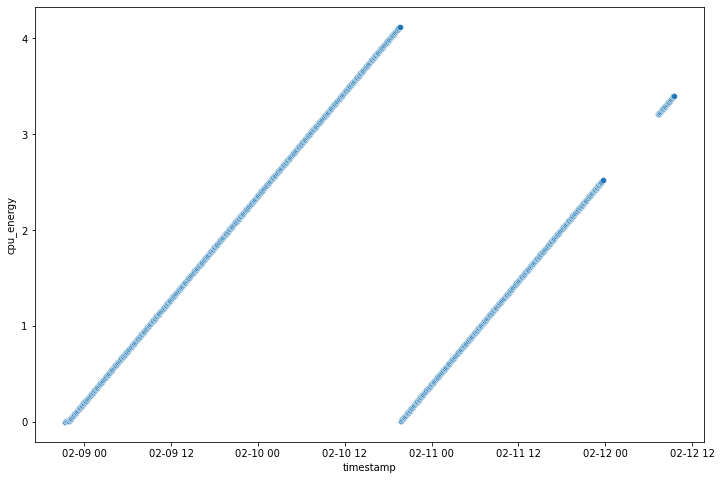

In [74]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=ben_desktop, x=ben_desktop.index, y='cpu_energy')

# gpu_energy

<AxesSubplot:xlabel='timestamp', ylabel='gpu_energy'>

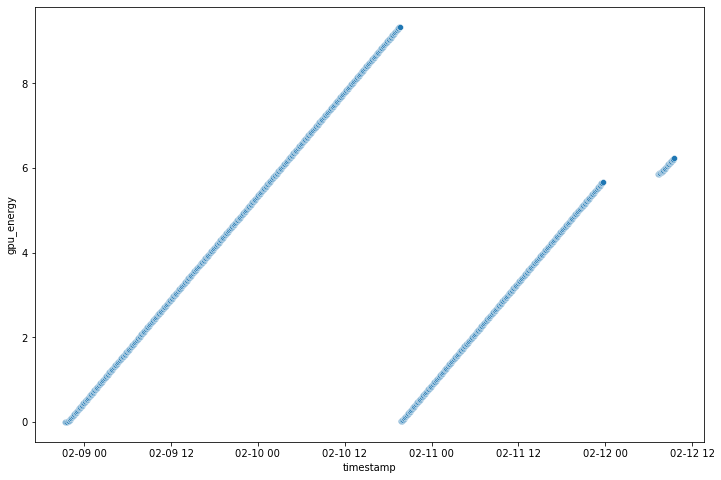

In [75]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=ben_desktop, x=ben_desktop.index, y='gpu_energy')

In [76]:
ben_desktop.columns

Index(['run_id', 'duration', 'emissions_sum', 'emissions_rate',
       'energy_consumed', 'cpu_power', 'gpu_power', 'ram_power', 'cpu_energy',
       'gpu_energy', 'ram_energy', 'id', 'datacenter'],
      dtype='object')

In [77]:
corr3 = ben_desktop[['duration', 'emissions_sum', 'emissions_rate',
       'energy_consumed','ram_energy', 'gpu_power','cpu_energy','gpu_energy']].corr()
corr3.style.background_gradient(cmap='coolwarm')

,duration,emissions_sum,emissions_rate,energy_consumed,ram_energy,gpu_power,cpu_energy,gpu_energy
duration,1.000000,0.998015,0.030273,0.998015,1.000000,0.053707,1.000000,0.995466
emissions_sum,0.998015,1.000000,0.052411,1.000000,0.998011,0.072676,0.998011,0.999480
emissions_rate,0.030273,0.052411,1.000000,0.052411,0.030321,0.867000,0.030321,0.063630
energy_consumed,0.998015,1.000000,0.052411,1.000000,0.998011,0.072676,0.998011,0.999480
ram_energy,1.000000,0.998011,0.030321,0.998011,1.000000,0.053759,1.000000,0.995460
gpu_power,0.053707,0.072676,0.867000,0.072676,0.053759,1.000000,0.053759,0.082240
cpu_energy,1.000000,0.998011,0.030321,0.998011,1.000000,0.053759,1.000000,0.995460
gpu_energy,0.995466,0.999480,0.063630,0.999480,0.995460,0.082240,0.995460,1.000000


# Comparaison entre datacenters

<AxesSubplot:xlabel='datacenter', ylabel='duration'>

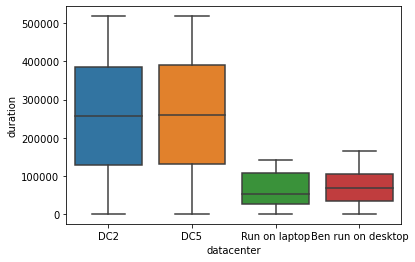

In [78]:
sns.boxplot(x="datacenter", y="duration", data=df)

<AxesSubplot:xlabel='datacenter', ylabel='emissions_sum'>

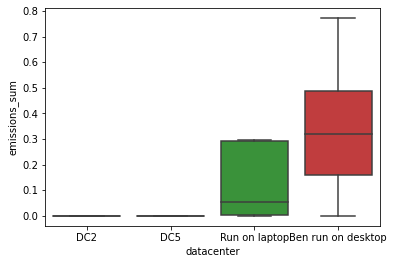

In [79]:
sns.boxplot(x="datacenter", y="emissions_sum", data=df)

<AxesSubplot:xlabel='datacenter', ylabel='emissions_rate'>

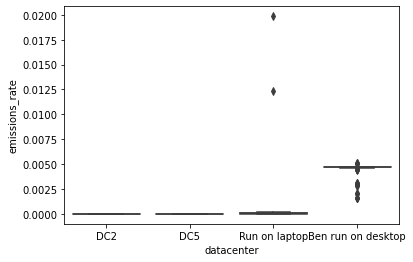

In [80]:
sns.boxplot(x="datacenter", y="emissions_rate", data=df)

<AxesSubplot:xlabel='datacenter', ylabel='energy_consumed'>

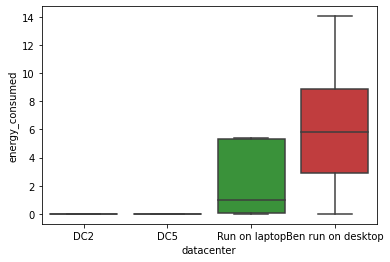

In [81]:
sns.boxplot(x="datacenter", y="energy_consumed", data=df)

<AxesSubplot:xlabel='datacenter', ylabel='cpu_power'>

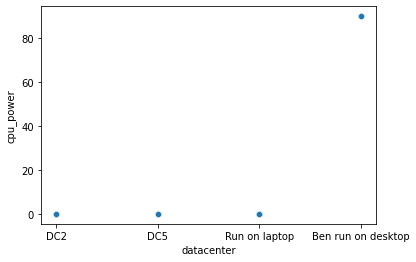

In [82]:
sns.scatterplot(x="datacenter", y="cpu_power", data=df)

<AxesSubplot:xlabel='datacenter', ylabel='gpu_power'>

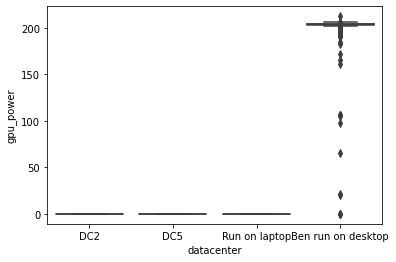

In [83]:
sns.boxplot(x="datacenter", y="gpu_power", data=df)

<AxesSubplot:xlabel='datacenter', ylabel='ram_power'>

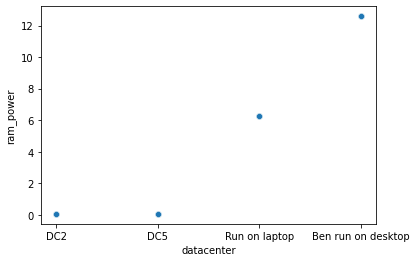

In [84]:
sns.scatterplot(x="datacenter", y="ram_power", data=df)

<AxesSubplot:xlabel='datacenter', ylabel='cpu_energy'>

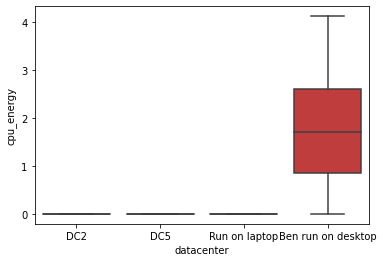

In [85]:
sns.boxplot(x="datacenter", y="cpu_energy", data=df)

<AxesSubplot:xlabel='datacenter', ylabel='gpu_energy'>

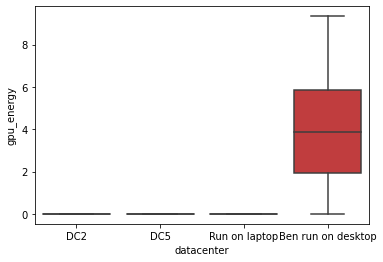

In [87]:
sns.boxplot(x="datacenter", y="gpu_energy", data=df)

<AxesSubplot:xlabel='datacenter', ylabel='ram_energy'>

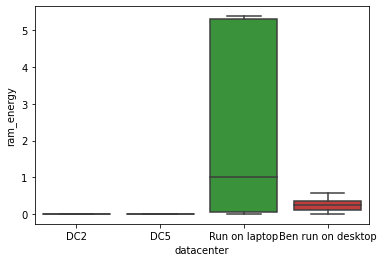

In [88]:
sns.boxplot(x="datacenter", y="ram_energy", data=df)

In [92]:
df.columns

Index(['run_id', 'duration', 'emissions_sum', 'emissions_rate',
       'energy_consumed', 'cpu_power', 'gpu_power', 'ram_power', 'cpu_energy',
       'gpu_energy', 'ram_energy', 'id', 'datacenter'],
      dtype='object')